In [198]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [154]:
dataset = pd.read_csv("flightdata.csv")

In [155]:
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [156]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [157]:
dataset = dataset.drop('Unnamed: 25', axis=1)
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [158]:
dataset = dataset[["FL_NUM", "MONTH", "DAY_OF_MONTH",  "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME", "DEP_DEL15", "ARR_DEL15"]]

In [159]:
dataset.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [160]:
dataset[dataset.isnull().any(axis=1)].head(10)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,NaN
179,86,1,10,7,MSP,DTW,1632,NaN,NaN
184,557,1,10,7,MSP,DTW,912,0.0,NaN
210,1096,1,10,7,DTW,MSP,1303,NaN,NaN
478,1542,1,22,5,SEA,JFK,723,NaN,NaN
481,1795,1,22,5,ATL,JFK,2014,NaN,NaN
491,2312,1,22,5,MSP,JFK,2149,NaN,NaN
499,423,1,23,6,JFK,ATL,1600,NaN,NaN
500,425,1,23,6,JFK,ATL,1827,NaN,NaN
501,427,1,23,6,JFK,SEA,1053,NaN,NaN


In [161]:
dataset['DEP_DEL15'].mode()

0    0.0
Name: DEP_DEL15, dtype: float64

In [162]:
dataset = dataset.fillna({'ARR_DEL15': 1})
dataset = dataset.fillna({'DEP_DEL15': 0})
dataset.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [163]:
import math
for index, row in dataset.iterrows():
  dataset.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME']/100)
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [164]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset['DEST'])
dataset['ORIGIN'] = le.fit_transform(dataset['ORIGIN'])

In [165]:
dataset.head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [167]:
dataset['ORIGIN'].unique()

array([0, 1, 4, 3, 2])

dataset = pd.get_dummies(dataset, columns=['ORIGIN', 'DEST'])
dataset.head()

In [168]:
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8:9].values

In [169]:
x

array([[1.399e+03, 1.000e+00, 1.000e+00, ..., 4.000e+00, 2.100e+01,
        0.000e+00],
       [1.476e+03, 1.000e+00, 1.000e+00, ..., 3.000e+00, 1.400e+01,
        0.000e+00],
       [1.597e+03, 1.000e+00, 1.000e+00, ..., 4.000e+00, 1.200e+01,
        0.000e+00],
       ...,
       [1.823e+03, 1.200e+01, 3.000e+01, ..., 4.000e+00, 2.200e+01,
        0.000e+00],
       [1.901e+03, 1.200e+01, 3.000e+01, ..., 4.000e+00, 1.800e+01,
        0.000e+00],
       [2.005e+03, 1.200e+01, 3.000e+01, ..., 1.000e+00, 9.000e+00,
        0.000e+00]])

In [170]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,5:6]).toarray()


In [171]:
z


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [172]:
t

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [173]:
x=np.delete(x,[4,5],axis=1)

In [174]:
dataset.describe()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
count,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000
mean,1334.325617,6.628973,15.790758,3.960199,1.837325,1.806607,15.067314,0.141483,0.139168
std,811.875227,3.354678,8.782056,1.995257,1.489464,1.496328,5.023534,0.348535,0.346138
min,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,624.000000,4.000000,8.000000,2.000000,0.000000,0.000000,11.000000,0.000000,0.000000
50%,1267.000000,7.000000,16.000000,4.000000,2.000000,2.000000,15.000000,0.000000,0.000000
75%,2032.000000,9.000000,23.000000,6.000000,3.000000,3.000000,19.000000,0.000000,0.000000
max,2853.000000,12.000000,31.000000,7.000000,4.000000,4.000000,23.000000,1.000000,1.000000


<ipython-input-175-43f5c122a6ef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.MONTH)


<Axes: xlabel='MONTH', ylabel='Density'>

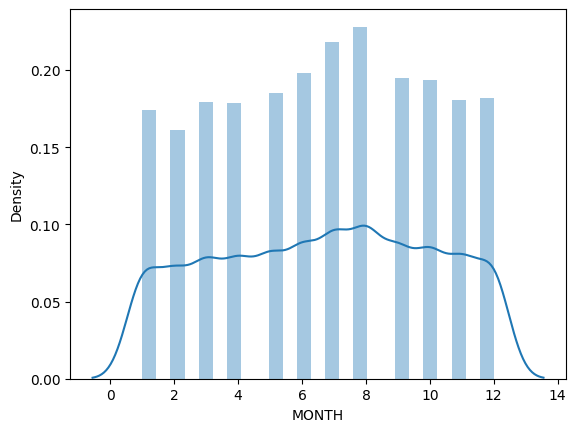

In [175]:
sns.distplot(dataset.MONTH)

<Axes: xlabel='DEP_DEL15', ylabel='ARR_DEL15'>

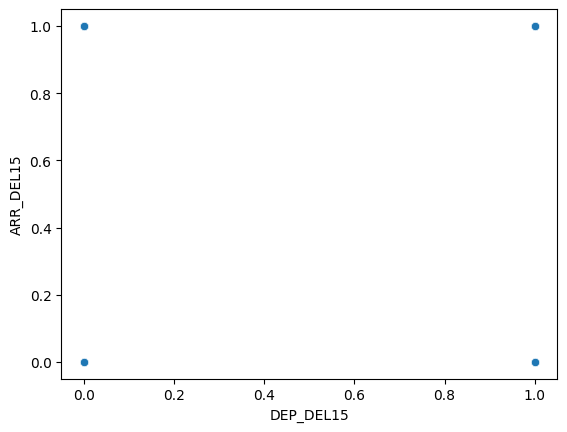

In [176]:
sns.scatterplot(x='DEP_DEL15',y='ARR_DEL15', data = dataset)

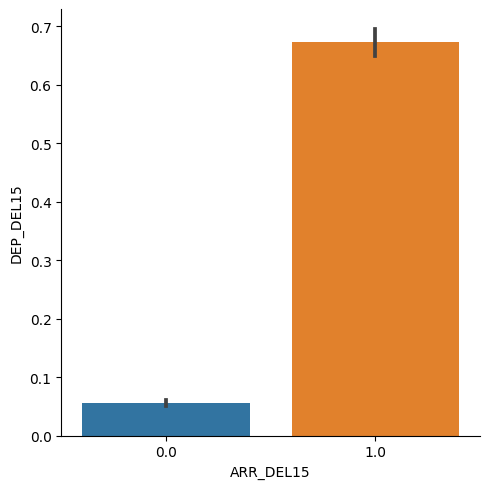

In [ ]:
sns.catplot(x="ARR_DEL15", y="DEP_DEL15", kind='bar', data=dataset)

<Axes: >

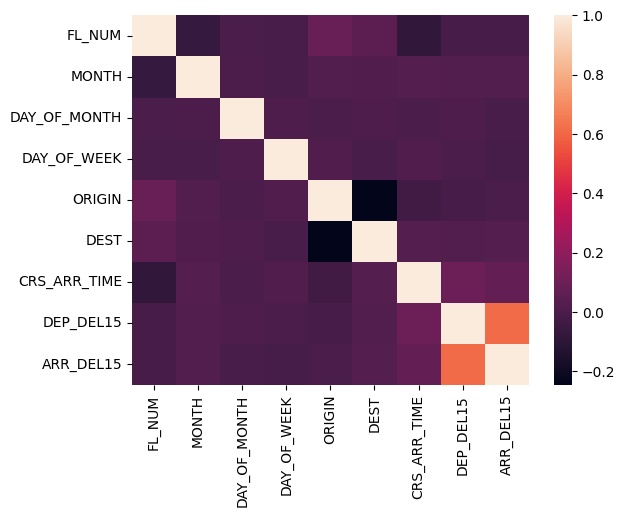

In [177]:
sns.heatmap(dataset.corr())

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [179]:
x_test.shape

(2247, 6)

In [180]:
x_train.shape

(8984, 6)

In [181]:
y_test.shape

(2247, 1)

In [182]:
y_train.shape

(8984, 1)

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [184]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(random_state=0)
Classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [185]:
decisiontree = Classifier.predict(x_test)


In [186]:
decisiontree

array([0., 0., 0., ..., 0., 0., 0.])

In [187]:
from sklearn.metrics import accuracy_score
desacc = accuracy_score(y_test,decisiontree)

In [188]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [189]:
rfc.fit(x_train,y_train)

<ipython-input-189-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [190]:
y_predict = rfc.predict(x_test)

In [191]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [192]:
Classification = Sequential()
Classification.add(Dense(30,activation='relu'))
Classification.add(Dense(128,activation='relu'))
Classification.add(Dense(64,activation='relu'))
Classification.add(Dense(32,activation='relu'))
Classification.add(Dense(1,activation='sigmoid'))


In [193]:
Classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']
                       )

In [194]:
Classification.fit(x_train,y_train,batch_size=4,validation_split=0.2,epochs=100)

Epoch 1/100
1797/1797 [==============================] - 6s 3ms/step - loss: 0.2872 - accuracy: 0.9016 - val_loss: 0.2782 - val_accuracy: 0.9060
Epoch 2/100
1797/1797 [==============================] - 5s 3ms/step - loss: 0.2748 - accuracy: 0.9045 - val_loss: 0.2693 - val_accuracy: 0.9060
Epoch 3/100
1797/1797 [==============================] - 4s 2ms/step - loss: 0.2717 - accuracy: 0.9047 - val_loss: 0.2700 - val_accuracy: 0.9060
Epoch 4/100
1797/1797 [==============================] - 5s 3ms/step - loss: 0.2701 - accuracy: 0.9045 - val_loss: 0.2758 - val_accuracy: 0.9015
Epoch 5/100
1797/1797 [==============================] - 5s 3ms/step - loss: 0.2674 - accuracy: 0.9040 - val_loss: 0.2689 - val_accuracy: 0.9054
Epoch 6/100
1797/1797 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9040 - val_loss: 0.2710 - val_accuracy: 0.9054
Epoch 7/100
1797/1797 [==============================] - 5s 3ms/step - loss: 0.2644 - accuracy: 0.9043 - val_loss: 0.2713 - val_ac

In [195]:
y_pred = Classifier.predict([[129,99,1,0,0,1,0,1,1,1,0,1,1,1,1,1]])
print(y_pred)
(y_pred)

ValueError: ignored

In [ ]:
Classification.save('flight.hs')

In [ ]:
y_pred = Classification.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[4.1837987e-02],
       [2.6760180e-10],
       [1.1159027e-03],
       ...,
       [8.1731957e-07],
       [9.7526290e-06],
       [3.7990180e-01]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [196]:
def predict_exist(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshpae(1, -1)
  sample_value = sc.transform(sample_value)
  return Classifier.predict(sample_values)
  

In [197]:
test=Classification.predict([[1,1,121.000000,36.0,0,0,1,0,1,1,1,1,1,1,1,1]])
if test==1:
  print('Prediction: Chance of delay')
else:
  print('Prediction: No chance of delay.')


ValueError: ignored